<a href="https://colab.research.google.com/github/sifiso-ncube/thesis/blob/main/SWMM_ExtrCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pyswmm import  Output, Simulation, Subcatchments, Links, Nodes, RainGages
from swmm.toolkit.shared_enum import LinkAttribute, SubcatchAttribute, NodeAttribute
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np


In [64]:
sim = Simulation(r"./15.10.1realday.inp")              #r means treat as raw string

Running the model

In [65]:
sim.execute() 


... SWMM Version 5.1.13
... Run Complete

**NODES**
(tested using node N33-1)

In [ ]:
# Number of Nodes
def Ex_nmbr_nodes():
  with Output('15.10.1realday.out') as out:
    number_of_nodes = len(out.nodes)
    return number_of_nodes

print("The number of nodes is: ", Ex_nmbr_nodes())


The number of nodes is:  167


In [ ]:
# Nodes in the drainage network
# returns a dictionary of model node names with their indices as values 
def Ex_node_ids():
  with Output('15.10.1realday.out') as out:
    ids = out.nodes
    return ids
  
Ex_node_ids()

**Node Attributes**
-For all nodes at given time, get a particular attribute.
-returns a dictionary of attribute values for all nodes at given timestep

Node Invert depth 

In [ ]:
#Invert Depth
#For all nodes at given time, get the invert depth.
def Ex_invert_depth():
  with Output('15.10.1realday.out') as out:
      data = out.node_attribute(NodeAttribute.INVERT_DEPTH, datetime(2020, 10, 15, 21))
      index_list= []
      node_invdepth = []
      for object in data:
         if data[object]>0:
            node_invdepth.append(data[object])       #data[object] gives the invert depth
            index_list.append(object)                #the object is the node name 
         else:
            pass       
      return node_invdepth, index_list
 
      
node_invdepth, index_list = Ex_invert_depth()        #assigning the function outputs to the list variables

##no need to plot, make a table

Node Flooding

Enter the point (node) of interest: N32-1


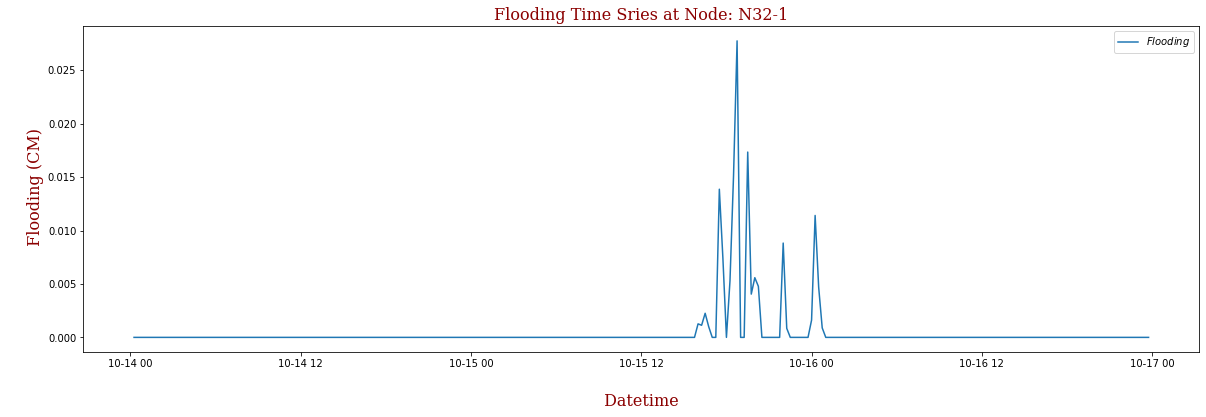

In [72]:
sim = Simulation(r"./15.10.1realday.inp")  
def Ex_nodeFlooding(node_name):
    nodeflood = Nodes(sim)[node_name]
    nodfloodlst= []
    time = []
    sim.step_advance(60*15)       #every 15 mins
    for step in sim:
        nodfloodlst.append(nodeflood.flooding)
        time.append(sim.current_time)
    return nodfloodlst, time

node_name = input ("Enter the point (node) of interest: ")

nodfloodlst, time = Ex_nodeFlooding(node_name)
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.figure(figsize = [20, 6])
plt.plot(time,nodfloodlst, label = '$Flooding $')
plt.xlabel("\n Datetime ",fontdict = font)
plt.ylabel("\n Flooding (CM)",fontdict = font)
plt.title("Flooding Time Series at Node: " +str(node_name), fontdict = font)
#plt.xticks(nodes, rotation ='vertical')
plt.legend()
plt.show()


Ponded Volume- for all nodes at a given time

These points are not flooded ['N10-17-1', 'N10-31-1', 'N11-39-1', 'N11-46', 'N11-46-1', 'N1-17', 'N12-45', 'N1-26-1', 'N13-25-1', 'N13-34', 'N13-48', 'N1-4-1', 'N1-8', 'N3-1', 'N36-1', 'N36-12', 'N36-16-1', 'N36-20-1', 'N36-29', 'N36-38-1', 'N36-6', 'N37-12', 'N38-11', 'N38-1-1', 'N38-18', 'N38-29', 'N38-43', 'N38-49', 'N39-1', 'N39-12', 'N39-7', 'N40-1', 'N41-1', 'N43-14', 'N43-27-1', 'N43-4', 'N45-1', 'N46-1', 'N46-15', 'N46-7', 'N47-10', 'N48-10-1', 'N48-11', 'N48-12-1', 'N48-4', 'N49-1', 'N49-18', 'N49-9-1', 'N50-10', 'N52-11', 'N54-10-1', 'N54-25-1', 'N54-27-1', 'N54-38', 'N54-4', 'N55-1', 'N56-1', 'N57-1', 'N58-1', 'N59-1', 'N59-12', 'N59-21-1', 'N59-28', 'N59-31', 'N59-39', 'N59-43-1', 'N59-47-1', 'N59-5-1', 'N59-8', 'N60-1', 'N60-4', 'N62-1', 'N63-1', 'N64-1', 'N64-22', 'N64-30', 'N65-1', 'N65-32', 'N66-1', 'N66-3-1', 'N66-6', 'N66-8-1', 'N67-1', 'N68-8', 'N7-1', 'N8-21', 'N8-49-1', 'N8-67', 'N8-82', 'N8-96', 'N8-98-1', 'N1-30', 'N36-45', 'N66-12', 'N9-4']


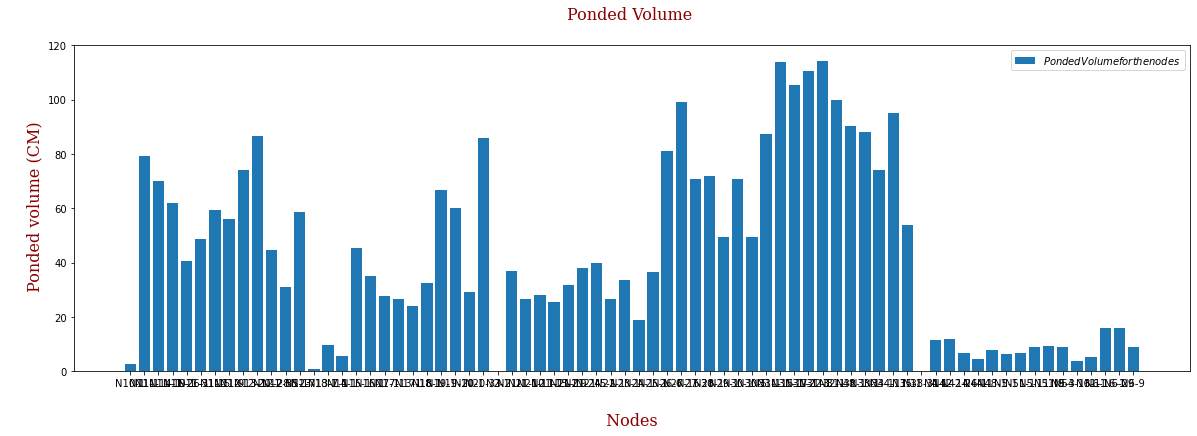

In [ ]:
#Ponded Volume
#For all nodes at given time, get the ponded volume.
#returns a dictionary of attribute values for all nodes at given timestep
def Ex_ponded_volume():
  with Output('15.10.1realday.out') as out:
      data = out.node_attribute(NodeAttribute.PONDED_VOLUME, datetime(2020, 10, 15, 21))
      node_pondvol = []
      index_list= []
      non_ponded= []
      for object in data:
         if data[object]>0:                         # only those nodes which are flooded/ponded
            node_pondvol.append(data[object])       #data[object] gives the ponded volume
            index_list.append(object)                #the object is the node name 
         else:
            non_ponded.append(object)       
         #print(object, data[object])
      return node_pondvol, index_list, non_ponded     
       

      
node_pondvol, index_list, non_ponded = Ex_ponded_volume()      #assigning the function outputs to the list variables

print("These points are not flooded", non_ponded)

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.figure(figsize = [20, 6])
plt.bar(index_list, node_pondvol, label = '$Ponded Volume for the nodes $')
plt.xlabel("\n Nodes ",fontdict = font)
plt.ylabel("\n Ponded volume (CM)",fontdict = font)
plt.title("Ponded Volume \n",fontdict = font)
#plt.xticks(nodes, rotation ='vertical')
plt.legend()
plt.show()

Node Attributes for a given node

In [ ]:
# Node Attributes
#Gets all the attributes for a node at given time.
#returns a dictionary of attributes for a node at given timestep

def Ex_node_attributes(node_name):
  with Output('15.10.1realday.out') as out:
      data = out.node_result(node_name, datetime(2020, 10, 15, 21))
      index_list= []
      node_attr = []
      for object in data:
         node_attr.append(data[object])       #data[object] gives the value
         index_list.append(object)                #the object is the node attribute 
      return node_attr, index_list     
         #print(object, data[object])


node_name = input ("Enter the point (node) of interest: ")

node_attr, index_list = Ex_node_attributes(node_name)       #assigning the function outputs to the list variables
 ## make a table



Hydraulic head for all nodes at a given time

In [ ]:
#Hydraulic Head  (not sure we need this)
#For all nodes at given time, get the Hydraulic head.
#returns a dictionary of attribute values for all nodes at given timestep
def Ex_hydraulic_head():
  with Output('15.10.1realday.out') as out:
      data = out.node_attribute(NodeAttribute.HYDRAULIC_HEAD, datetime(2020, 10, 16, 21))
      node_hydhead = []
      index_list= []
      for object in data:
         if data[object]>0:
            node_hydhead.append(data[object])       #data[object] gives the hydraulic head
            index_list.append(object)                #the object is the node name 
         else:
            pass       
         #print(object, data[object])
      return index_list, node_hydhead
      
index_list, node_hydhead = Ex_hydraulic_head()      #assigning the function outputs to the list variables

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.figure(figsize = [20, 6])
plt.bar(index_list, node_hydhead, label = '$hydraulic head for the nodes $')
plt.xlabel("\n nodes ",fontdict = font)
plt.ylabel("\n Hydraulic head (m)",fontdict = font)
plt.title("Hydraulic Head \n",fontdict = font)
#plt.xticks(nodes, rotation='vertical')
plt.legend()
plt.show()

**Node time series results for particular attributes**

Time series for the node hydraulic head

In [ ]:
#Node Time series for hydraulic head. you specify the start and end time
# Returns a dictionary of attribute values with between start_index and end_index with reporting timesteps as keys
def Ex_node_hydraulic_head(node_name):
  with Output('15.10.1realday.out') as out:
      ts = out.node_series(node_name, NodeAttribute.HYDRAULIC_HEAD, datetime(2020, 10, 15, 12), datetime(2020, 10, 16, 12))
      ts_node_hydhead = []
      index_list= []

      for index in ts:
        ts_node_hydhead.append(ts[index])     #ts[index] gives the time series value of hydraulics head at node N33-1
        index_list.append(index)                #the index is the node name
        #print(index, ts[index])
      return ts_node_hydhead, index_list
      
node_name = input ("Enter the location (node) of interest: ")

ts_node_hydhead, index_list = Ex_node_hydraulic_head(node_name)         #assigning the function outputs to the list variables

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.figure(figsize = [20, 6])
plt.plot(index_list, ts_node_hydhead, label = '$ hydraulic head  $')
plt.xlabel("\n Nodes ",fontdict = font)
plt.ylabel("\n Hydraulic head (m)",fontdict = font)
plt.title("Hydraulic Head for Node: "+ str(node_name), fontdict = font)
#plt.xticks(nodes, rotation='vertical')
plt.legend()
plt.show()

Time series for the node ponded volume

Enter the point (node) of interest: N33-1


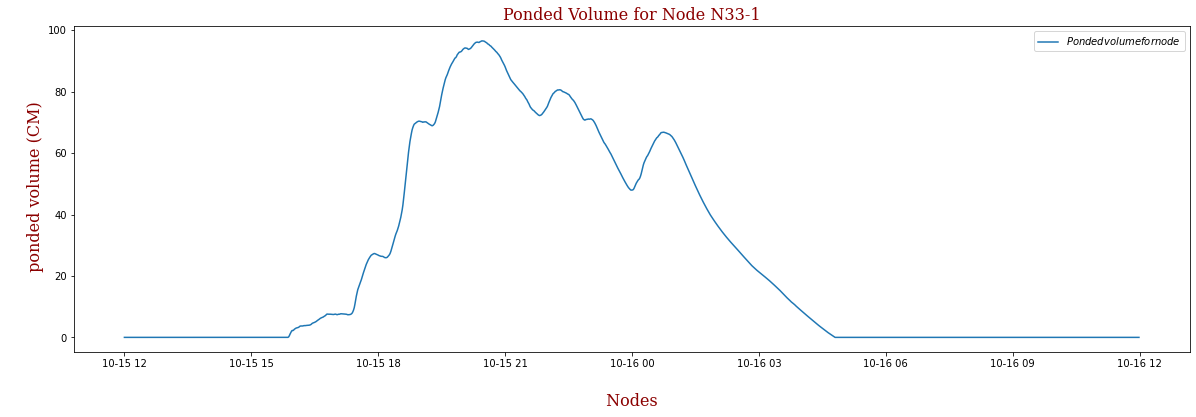

In [ ]:
#Node Time series for ponded volume. you specify the start and end time
# Returns a dictionary of attribute values with between start_index and end_index with reporting timesteps as keys
def Ex_node_pondedvol(node_name):
  with Output('15.10.1realday.out') as out:
      ts = out.node_series(node_name, NodeAttribute.PONDED_VOLUME, datetime(2020, 10, 15, 12), datetime(2020, 10, 16, 12))
      ts_node_pondedvol = []
      index_list= []

      for index in ts:
        ts_node_pondedvol.append(ts[index])     #ts[index] gives the time series value of hydraulics head at node N33-1
        index_list.append(index)                #the index is the node name
      return ts_node_pondedvol,index_list 


node_name = input ("Enter the point (node) of interest: ")   

ts_node_pondedvol,index_list = Ex_node_pondedvol(node_name)   # assigning the function outputs to the list variables

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.figure(figsize = [20, 6])
plt.plot(index_list, ts_node_pondedvol, label = '$ Ponded volume for node $')
plt.xlabel("\n Nodes ",fontdict = font)
plt.ylabel("\n Ponded volume (CM)",fontdict = font)
plt.title("Ponded Volume for Node " + str(node_name), fontdict = font)
#plt.xticks(nodes, rotation='vertical')
plt.legend()
plt.show()

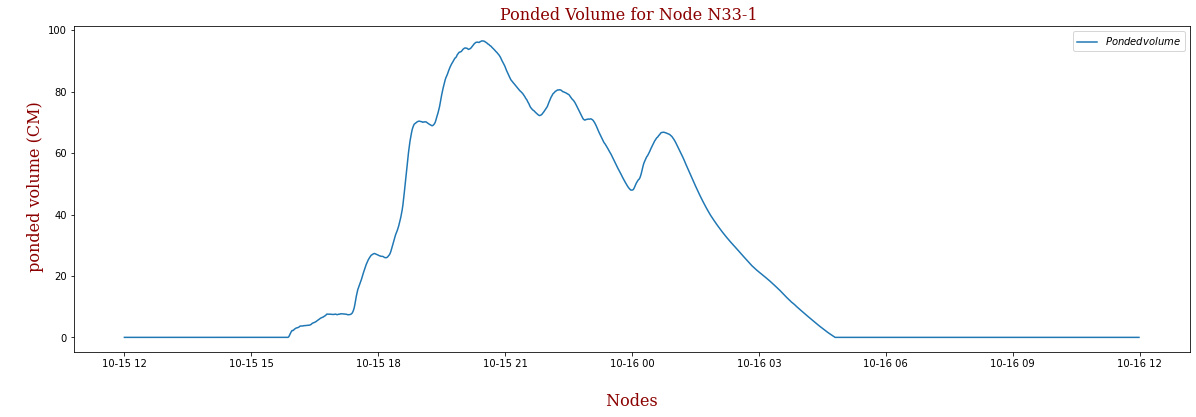

In [ ]:
#same as above but for node N33-1
#Node Time series for ponded volume. you specify the start and end time
# Returns a dictionary of attribute values with between start_index and end_index with reporting timesteps as keys
def Ex_node_pondedvol():
  with Output('15.10.1realday.out') as out:
      ts = out.node_series("N33-1", NodeAttribute.PONDED_VOLUME, datetime(2020, 10, 15, 12), datetime(2020, 10, 16, 12))
      ts_node_pondedvol = []
      index_list= []

      for index in ts:
        ts_node_pondedvol.append(ts[index])     #ts[index] gives the time series value of hydraulics head at node N33-1
        index_list.append(index)                #the index is the node name
      return ts_node_pondedvol,index_list 
           
ts_node_pondedvol,index_list = Ex_node_pondedvol()   # assigning the function outputs to the list variables

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.figure(figsize = [20, 6])
plt.plot(index_list, ts_node_pondedvol, label = '$ Ponded volume $')
plt.xlabel("\n Nodes ",fontdict = font)
plt.ylabel("\n ponded volume (CM)",fontdict = font)
plt.title("Ponded Volume for Node N33-1 ", fontdict = font)
#plt.xticks(nodes, rotation='vertical')
plt.legend()
plt.show()


**LINKS**

Number of pipes

In [ ]:
# Number of Pipes/ links
def Ex_nmbr_links():
  with Output('15.10.1realday.out') as out:
    number_of_links = len(out.links)
    return number_of_links

print("The number of links is: ", Ex_nmbr_links())

The number of links is:  175


Pipe ids (names)

In [ ]:
# Links in the drainage network
# returns a dictionary of model link names with their indices as values 
def Ex_link_ids():
  with Output('15.10.1realday.out') as out:
    link_ids = out.links
  return link_ids
  
Ex_link_ids()


Link/pipe flow rate

Negative flow means that the upstream node invert elevation is lower than the downstream node invert elevation for the conduit. So this would mean an adverse slope. If the Q is in the downstream direction, the output will be signed as negative, and vice versa. 

In [ ]:
# Link Flow rate for all the links at a fixed time
def Ex_flrate_links():
  with Output('15.10.1realday.out') as out:
      data = out.link_attribute(LinkAttribute.FLOW_RATE, datetime(2020, 10, 15, 21))      #chose this day bcoz its among the most wet days.
      index_list= []
      linkFl = []
      for object in data:
         #print(object, data[object])             # The negative flow results from adverse slope
         linkFl.append(data[object])       #data[object] gives the  value of flowrate at a link
         index_list.append(object)           #the object is the link name 
         
      return linkFl, index_list

linkFl, index_list = Ex_flrate_links()     
         
 
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.figure(figsize = [20, 6])
plt.bar(index_list, linkFl, label = '$flowrate in the links $')
plt.xlabel("\n Links ",fontdict = font)
plt.ylabel("\n Flow rate (CMS)",fontdict = font)
plt.title("Flow Rate in Different Links \n",fontdict = font)
#plt.xticks(Links, rotation='vertical')
plt.legend()
plt.show()
      




**Time series for different link attributes**


Link flow rate

In [ ]:

#Link Flowrate for one link for a period of time
#tried with link 'LN31-5'

def Ex_link_flowrate(link_id):
  with Output('15.10.1realday.out') as out:
     ts = out.link_series(link_id, LinkAttribute.FLOW_RATE, datetime(2020, 10, 15, 12), datetime(2020, 10, 16, 12))
     index_list= []
     ts_linkFl = []
     for index in ts:
       #print(index, ts[index])
       ts_linkFl.append(ts[index])     #ts[index] gives the time series value of flowrate at link LN31-5
       index_list.append(index)        #index is the datetime
       return ts_linkFl, index_list
       #print(ts_linkFl)

link_id = input("Enter the pipe(link) of interest : ")

ts_linkFl, index_list = Ex_link_flowrate(link_id)

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.figure(figsize = [15, 5])
plt.plot(index_list, ts_linkFl, '--b', label = '$ flowrate in link $')
plt.xlabel("\n Time ",fontdict = font)
plt.ylabel("\n Flow rate (CMS)",fontdict = font)
plt.title("Flow Rate in Link ",link_id, link_id, fontdict = font)
plt.legend()
plt.show()




Link Velocity Time Series

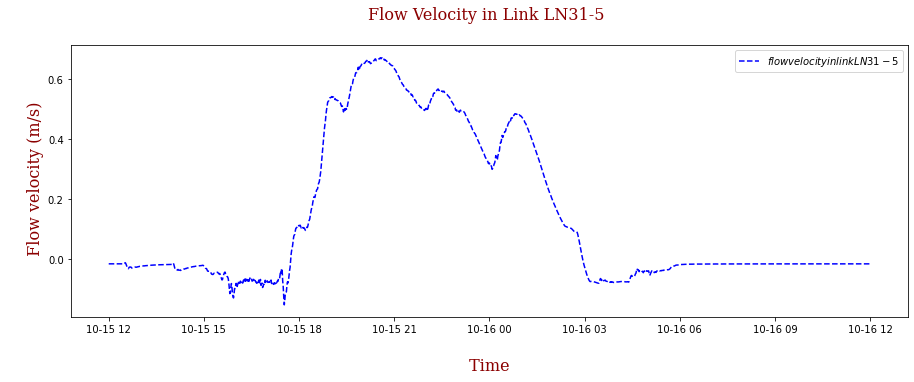

In [ ]:
#Link Velocity
def Ex_link_flowvel():
  with Output('15.10.1realday.out') as out:
     ts = out.link_series('LN31-5', LinkAttribute.FLOW_VELOCITY, datetime(2020, 10, 15, 12), datetime(2020, 10, 16, 12))
     index_list= []
     ts_linkFl = []
     for index in ts:
       #print(index, ts[index])
       ts_linkFl.append(ts[index])     #ts[index] gives the time series value of flowrate at link LN31-5
       index_list.append(index)        #index is the datetime
      

     font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
     plt.figure(figsize = [15, 5])
     plt.plot(index_list, ts_linkFl, '--b', label = '$flow velocity in link LN31-5$')
     plt.xlabel("\n Time ",fontdict = font)
     plt.ylabel("\n Flow velocity (m/s)",fontdict = font)
     plt.title("Flow Velocity in Link LN31-5 \n",fontdict = font)
     plt.legend()
     plt.show()
      #plt.plot (ts_linkFl)


Ex_link_flowvel()

**SUBCATCHMENT ATTRIBUTES**

Subcatchment IDs

In [ ]:
def Ex_subcatchment_ids():
  with Output('15.10.1realday.out') as out:
    subctmts = out.subcatchments
    return subctmts

Ex_subcatchment_ids() 

Get the runoff rate for all subcatchments at a given time.

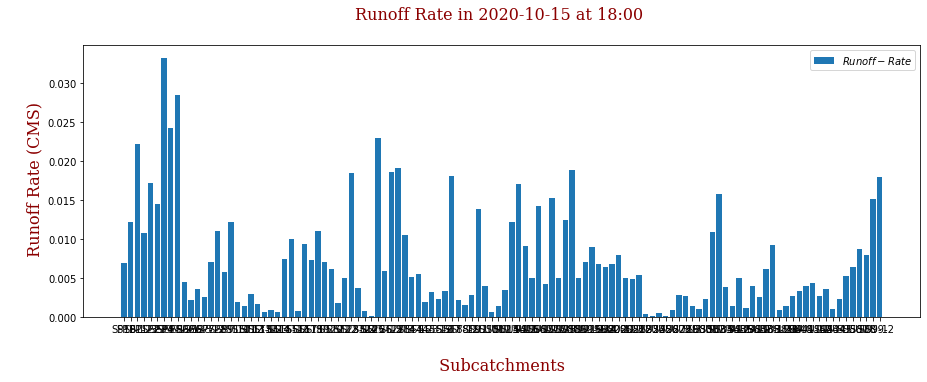

In [ ]:
def Ex_runoff_rate():
  with Output('15.10.1realday.out') as out:
    runoff_rate = []
    index_list= []
    data = out.subcatch_attribute(SubcatchAttribute.RUNOFF_RATE, datetime(2020, 10, 15, 21))
    for object in data:
      #print(object, data[object])
      runoff_rate.append(data[object])
      index_list.append(object)
    return runoff_rate, index_list

runoff_rate, index_list = (Ex_runoff_rate())
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.figure(figsize = [15, 5])
plt.bar(index_list, runoff_rate,  label = '$Runoff-Rate$')
plt.xlabel("\n Subcatchments ",fontdict = font)
plt.ylabel("\n Runoff Rate (CMS)",fontdict = font)
plt.title("Runoff Rate in 2020-10-15 at 18:00 \n",fontdict = font)
plt.legend()
plt.show()

**SUBCATCHMENT TIME SERIES FOR DIFFERENT ATTRIBUTE, FOR A SPECIFIED TIME FRAME**


**Get Subcatchment Time Series for Rainfall**

Enter the area of interest: SU19-4


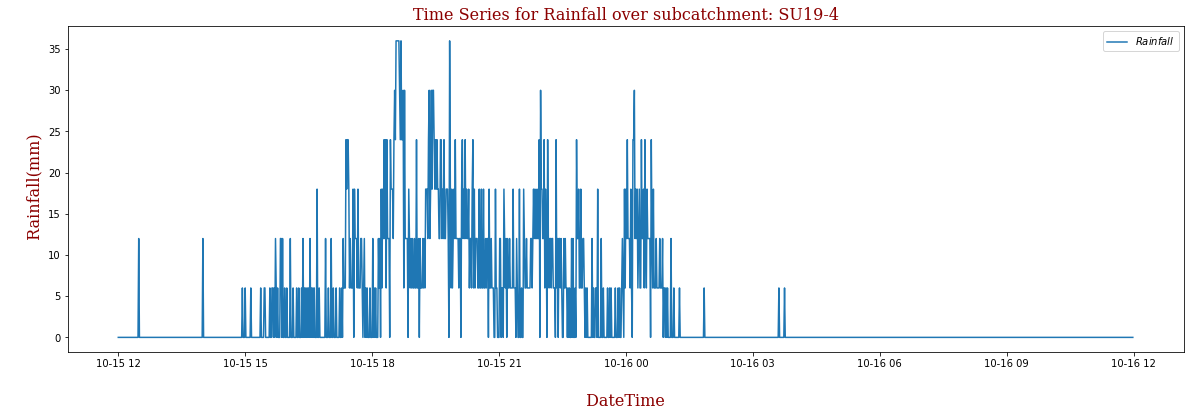

In [ ]:
#Subcatchment Time series for rainfall. you specify the start and end time
# Returns a dictionary of attribute values with between start_index and end_index with reporting timesteps as keys
def Ex_ts_rainfall(subctmt_name):
  with Output('15.10.1realday.out') as out:
      ts = out.subcatch_series(subctmt_name, SubcatchAttribute.RAINFALL, datetime(2020, 10, 15, 12), datetime(2020, 10, 16, 12))
      ts_rainfall = []
      index_list= []

      for index in ts:
        ts_rainfall.append(ts[index])     #ts[index] gives the time series value of hydraulics head at node N33-1
        index_list.append(index)                #the index is the node name
      return ts_rainfall,index_list 


subctmt_name = input ("Enter the area of interest: ")   

ts_rainfall,index_list = Ex_ts_rainfall(subctmt_name)   # assigning the function outputs to the list variables

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.figure(figsize = [20, 6])
plt.plot(index_list, ts_rainfall, label = '$ Rainfall $')
plt.xlabel("\n DateTime ",fontdict = font)
plt.ylabel("\n Rainfall(mm)",fontdict = font)
plt.title("Time Series for Rainfall over subcatchment: " + str(subctmt_name), fontdict = font)
#plt.xticks(nodes, rotation='vertical')
plt.legend()
plt.show()

**Get Subcatchment Time Series for Runoff Rate**

Enter the area of interest: ST25


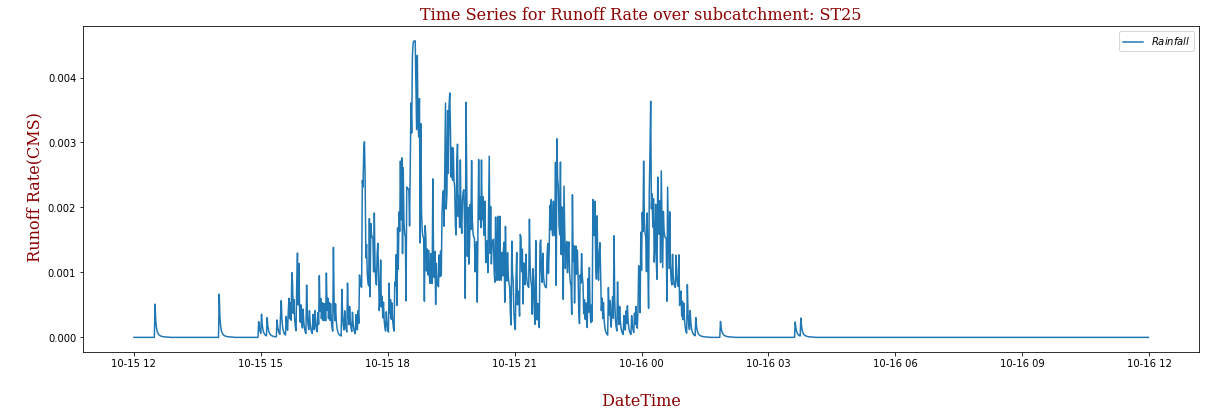

In [ ]:
#Sucatchment Time series for rainfall. you specify the start and end time
# Returns a dictionary of attribute values with between start_index and end_index with reporting timesteps as keys
def Ex_ts_runoffrate(subctmt_name):
  with Output('15.10.1realday.out') as out:
      ts = out.subcatch_series(subctmt_name, SubcatchAttribute.RUNOFF_RATE, datetime(2020, 10, 15, 12), datetime(2020, 10, 16, 12))
      ts_runoffrate = []
      index_list= []

      for index in ts:
        ts_runoffrate.append(ts[index])     #ts[index] gives the time series value of hydraulics head at node N33-1
        index_list.append(index)                #the index is the node name
      return ts_runoffrate,index_list 


subctmt_name = input ("Enter the area of interest: ")   

ts_runoffrate,index_list = Ex_ts_runoffrate(subctmt_name)   # assigning the function outputs to the list variables

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.figure(figsize = [20, 6])
plt.plot(index_list, ts_runoffrate, label = '$ Rainfall $')
plt.xlabel("\n DateTime ",fontdict = font)
plt.ylabel("\n Runoff Rate(CMS)",fontdict = font)
plt.title("Time Series for Runoff Rate over subcatchment: " + str(subctmt_name), fontdict = font)
#plt.xticks(nodes, rotation='vertical')
plt.legend()
plt.show()

Get all the System Attributes for a particular subcatchment at a given time

In [ ]:
def syst_attr():
    with Output('15.10.1realday.out') as out:
        data = out.system_result(datetime(2020, 10, 15, 21))
        for attribute in data:
            print(attribute, data[attribute])

syst_attr()